In [1]:
from lisa.utils import *
from lisa.library import *
import lisa.models, pytz
import numpy as np, pandas as pd, datetime
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix # for evaluation
import itertools

In [2]:
dataset = DataSet.objects.get(id=31)
train_dataset = DataSet.objects.get(id=32)

In [3]:
y_hat_test, df_with_class_instances, tresholds, scores = isolation_forest(dataset.dataframe, dataset.dataframe_class, train_dataset.dataframe, train_dataset.dataframe_class)

Number of anomaly instances: 133
Number of anomaly instances: 135
Train shape:  (933, 8)
Proportion of anomaly in training set: 0.00

Valid shape:  (533, 8)
Proportion of anomaly in validation set: 0.12

Test shape:,  (534, 8)
Proportion of anomaly in test set: 0.13

Threshold Normal 0.0418998388079
Threshold Anomaly -0.0282440092079
Higher Bound 0.0481848146291
Lower Bound -0.0324806105891
Final threshold: -0.016999
Test Recall Score: 0.652
Test Precision Score: 0.383
Test F1 Score: 0.482


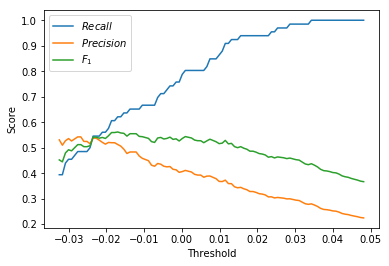

In [4]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_1$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.binary):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Copyed from a kernel by joparga3 https://www.kaggle.com/joparga3/kernels
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization


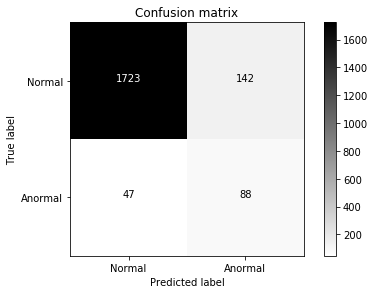

In [6]:
cnf_matrix = confusion_matrix(df_with_class_instances['Class'].values.astype(int), y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')

In [6]:
len(y_hat_test)

2000

In [7]:
dataset.dataframe.shape

(2000, 7)

In [10]:
df_with_class_instances.loc[:,df_with_class_instances.columns != 'Class'].columns

Index([43, 44, 45, 46, 47, 48, 49], dtype='object')

In [12]:
df_with_class_instances.columns.drop('Class')

Index([43, 44, 45, 46, 47, 48, 49], dtype='object')

In [13]:
df_with_class_instances

,43,44,45,46,47,48,49,Class
time,,,,,,,,
2017-07-01 00:00:00+00:00,2.884895,-0.204062,1.236310,0.955495,0.089623,0.460193,1.385533,False
2017-07-01 00:10:00+00:00,1.321490,0.860087,1.395479,1.493733,2.362070,-0.344222,1.360163,False
2017-07-01 00:20:00+00:00,1.270409,1.575793,0.289882,1.027687,2.054605,2.504680,2.208289,False
2017-07-01 00:30:00+00:00,0.190903,2.709922,3.429331,0.056687,1.225604,0.442584,1.615570,False
2017-07-01 00:40:00+00:00,0.517769,1.364974,1.965511,2.055085,1.300579,1.761271,3.498607,False
2017-07-01 00:50:00+00:00,0.926796,0.413715,3.053520,2.996077,1.432710,1.464311,3.187987,False
2017-07-01 01:00:00+00:00,0.597009,-0.816507,1.929766,2.538137,2.515515,1.774628,2.360423,False
2017-07-01 01:10:00+00:00,-0.089948,1.605354,0.729583,1.826335,0.251068,0.024094,2.681185,False
2017-07-01 01:20:00+00:00,1.982673,0.507247,0.142200,2.878970,0.938587,0.348477,0.835971,False


In [15]:
round(0.000562, 7)

0.000562